In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
import cv2
from PIL import Image
import os
import joblib
%matplotlib inline

In [37]:
import warnings
warnings.filterwarnings("ignore")

Github URL = https://github.com/SartajBhuvaji/Brain-Tumor-Classification-DataSet/archive/master.zip


In [38]:
import requests
from zipfile import ZipFile

# # Local path
# download_path = "C:\\Users\\klper\\OneDrive\\Desktop\\NITJ\\Computer Programming\\Programs\\Data Science\\DL\\Brain Tumour Classification"

# # Download the dataset as a zip file
# response = requests.get(github_url)
# zip_file_path = os.path.join(download_path,"dataset.zip")

# # Extract the contents of the zip file
# with open(zip_file_path, "wb") as zip_file:
#     zip_file.write(response.content)
# with ZipFile(zip_file_path, 'r') as zip_ref:
#     zip_ref.extractall(download_path)

TRAINING_PATH= "Brain-Tumor-Classification-DataSet-master/Training"
TESTING_PATH= "Brain-Tumor-Classification-DataSet-master/Testing"


In [40]:
training_images= []
training_labels= []

In [41]:
for i in os.listdir(TRAINING_PATH):
  class_name= i
  class_path= os.path.join(TRAINING_PATH, class_name)
  for j in os.listdir(class_path):
    img_path= os.path.join(class_path, j)
    img= cv2.imread(img_path)
    img_resized= cv2.resize(img,(256,256))
    training_images.append(img_resized)
    training_labels.append(class_name)

In [42]:
for i in os.listdir(TESTING_PATH):
  class_name= i
  class_path= os.path.join(TESTING_PATH, class_name)
  for j in os.listdir(class_path):
    img_path= os.path.join(class_path, j)
    img= cv2.imread(img_path)
    img_resized= cv2.resize(img,(256,256))
    training_images.append(img_resized)
    training_labels.append(class_name)

In [43]:
training_images= np.array(training_images)
training_labels= np.array(training_labels)

In [44]:
print(training_images.shape)
print(training_labels.shape)

(3264, 256, 256, 3)
(3264,)


In [45]:
training_images=training_images/255

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
x_train,x_test,y_train,y_test= train_test_split(training_images,training_labels,test_size=0.3,random_state=42)

In [49]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y_train= le.fit_transform(y_train)
y_test= le.fit_transform(y_test)
y_train= tf.keras.utils.to_categorical(y_train,num_classes=4)
y_test= tf.keras.utils.to_categorical(y_val,num_classes=4)

In [50]:
training_labels

array(['glioma_tumor', 'glioma_tumor', 'glioma_tumor', ...,
       'pituitary_tumor', 'pituitary_tumor', 'pituitary_tumor'],
      dtype='<U16')

In [74]:
model_inception.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [51]:
del training_images
del training_labels

### Applying Inception Model

In [35]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dropout

inception_resnetv2= tf.keras.applications.InceptionResNetV2(
    include_top= False,
    weights= "imagenet",
    input_shape= (256, 256, 3),
    pooling= "avg",
)

dropout_rate= 0.5
model= tf.keras.Sequential([
    inception_resnetv2,
    Dropout(dropout_rate),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    Dropout(dropout_rate),
    tf.keras.layers.Dense(4,activation='softmax')
])

batch_size=32
# model.compile(optimizer='adam',loss='categorical_crossentropy')
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])


219055592/219055592 [==============================] - 179s 1us/step



In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Funct  (None, 1536)              54336736  
 ional)                                                          
                                                                 
 dropout (Dropout)           (None, 1536)              0         
                                                                 
 flatten (Flatten)           (None, 1536)              0         
                                                                 
 dense (Dense)               (None, 512)               786944    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 4)                 2052      
                                                        

In [37]:
for layer in inception_resnetv2.layers:
  layer.trainable= False

To streamline computations, we employ a dropout rate of 50%. <br>Dropout is a technique used during training to prevent overfitting by randomly deactivating 50% of neurons in the hidden layers.

Within the hidden layers, we utilize the **Rectified Linear Unit (ReLU)** activation function. 
The output layer utilizes the **Softmax activation function**. Softmax is particularly useful for multi-class classification tasks. 

In [38]:
model_inception= tf.keras.models.Sequential()
model_inception.add(inception_resnetv2)

model_inception.add(tf.keras.layers.Flatten())
model_inception.add(tf.keras.layers.Dropout(0.5))
model_inception.add(tf.keras.layers.Dense(256,activation="relu",kernel_initializer='he_uniform'))
model_inception.add(tf.keras.layers.Dropout(0.5))
model_inception.add(tf.keras.layers.Dense(4,activation="softmax"))

In [39]:
model_inception.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [41]:
history=model_inception.fit(x_train,y_train,batch_size=64,validation_data=(x_test,y_test),epochs=15)

Epoch 1/15
36/36 [==============================] - 231s 6s/step - loss: 0.7032 - accuracy: 0.7299 - val_loss: 0.5642 - val_accuracy: 0.7806
Epoch 2/15
36/36 [==============================] - 307s 9s/step - loss: 0.6840 - accuracy: 0.7338 - val_loss: 0.5797 - val_accuracy: 0.7765
Epoch 3/15
36/36 [==============================] - 206s 6s/step - loss: 0.6191 - accuracy: 0.7684 - val_loss: 0.5204 - val_accuracy: 0.8051
Epoch 4/15
36/36 [==============================] - 272s 8s/step - loss: 0.5973 - accuracy: 0.7675 - val_loss: 0.4885 - val_accuracy: 0.8153
Epoch 5/15
36/36 [==============================] - 224s 6s/step - loss: 0.5865 - accuracy: 0.7741 - val_loss: 0.4978 - val_accuracy: 0.8010
Epoch 6/15
36/36 [==============================] - 194s 5s/step - loss: 0.5554 - accuracy: 0.7732 - val_loss: 0.4969 - val_accuracy: 0.8031
Epoch 7/15
36/36 [==============================] - 190s 5s/step - loss: 0.5678 - accuracy: 0.7806 - val_loss: 0.4752 - val_accuracy: 0.8204
Epoch 8/15
36

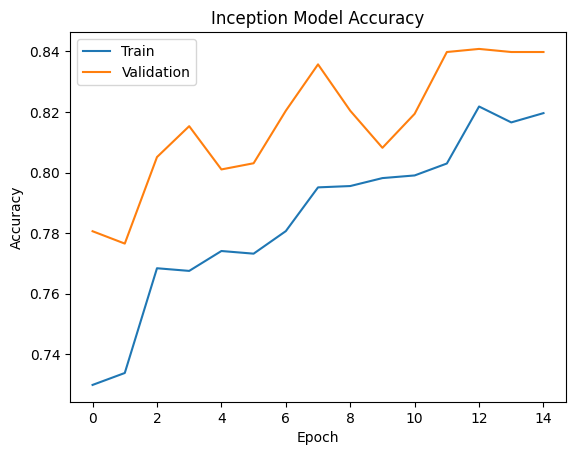

In [46]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Inception Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Validation'])
plt.savefig("images/Inception ResnetV2 without Data Augmentation.png")
plt.show()

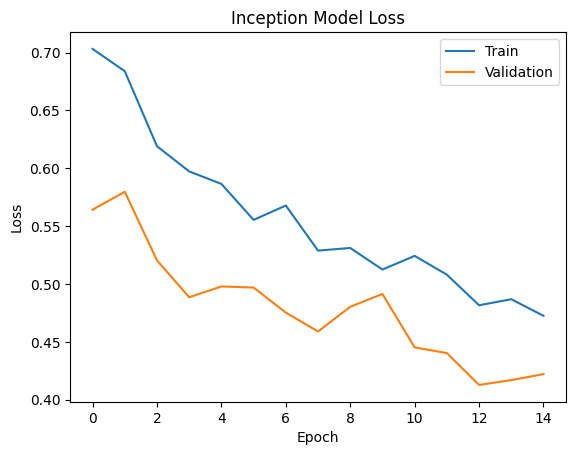

In [47]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Inception Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Validation'])
plt.savefig("images/Inception ResnetV2 without Data Augmentation Loss.png")
plt.show()

In [48]:
model_inception.save('Inception ResnetV2.h5')

### Applying ResNet Model
It has an improvement over the original ResNet-152 model, with changes primarily focused on enhancing training efficiency and performance. Currently, it is the best model available to use.

In [171]:
model= tf.keras.models.load_model("Xception without Data Augumentation.h5")

In [174]:
model.evaluate(x_val,y_val)

31/31 [==============================] - 123s 4s/step - loss: 0.2922 - accuracy: 0.8949


[0.2921762764453888, 0.8948979377746582]

In [177]:
print("Shape of x_val:",x_val.shape)
print("Shape of y_val:",y_val.shape)

Shape of x_val: (980, 256, 256, 3)
Shape of y_val: (980, 4)


In [175]:
y_pred= model.predict(x_val)

31/31 [==============================] - 91s 3s/step


In [176]:
y_pred_new= np.argmax(y_pred,axis=1)
y_test_new= np.argmax(y_val,axis=1)

In [178]:
print(classification_report(y_test_new,y_pred_new))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89       307
           1       0.77      0.93      0.84       283
           2       0.98      0.87      0.92       139
           3       0.96      0.94      0.95       251

    accuracy                           0.89       980
   macro avg       0.92      0.89      0.90       980
weighted avg       0.91      0.89      0.90       980



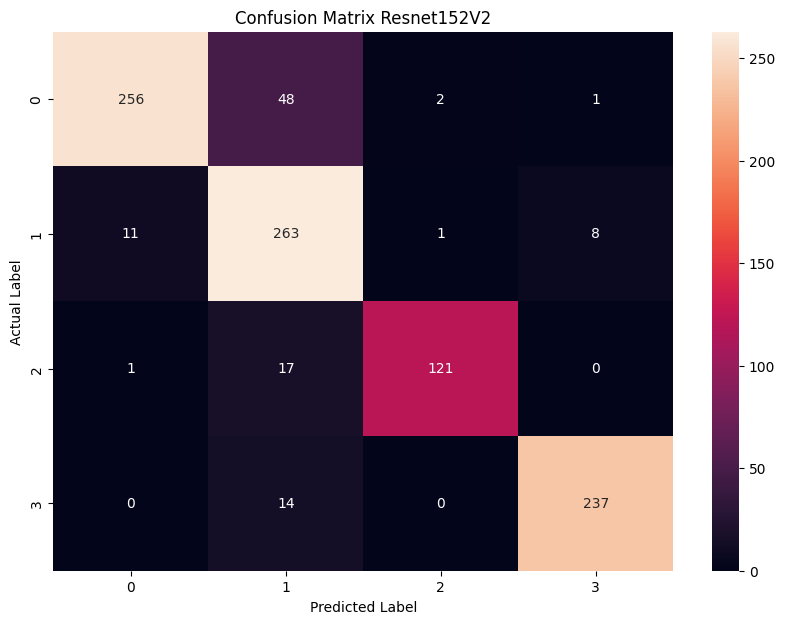

In [183]:
from sklearn.metrics import confusion_matrix
conf_matrix= confusion_matrix(y_test_new, y_pred_new)

plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.title("Confusion Matrix Resnet152V2")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.savefig("images/Resnet 152V2 Confusion Matrix.png")
plt.show()
